<a href="https://colab.research.google.com/github/IERoldan/churn_clients_data/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [40]:


import pandas as pd
url = '/content/sample_data/TelecomX_Data.json'
df = pd.read_json(url)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [41]:
# Separar las columnas anidadas en nuevas columnas
df = df.join(pd.json_normalize(df["customer"])).drop(columns="customer")
df = df.join(pd.json_normalize(df["phone"])).drop(columns="phone")
df = df.join(pd.json_normalize(df["internet"])).drop(columns="internet")
df = df.join(pd.json_normalize(df["account"])).drop(columns="account")
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

In [42]:
# 1. Verificar valores nulos
df.isnull().sum()

# 2. Eliminar duplicados
df = df.drop_duplicates()

# 3. Unificar formato
df["gender"] = df["gender"].str.capitalize()

# 4. Asegurar tipo numérico
df["Charges.Monthly"] = pd.to_numeric(df["Charges.Monthly"], errors="coerce")

# 5. Crear columna "Cuentas_Diarias"
df["Cuentas_Diarias"] = df["Charges.Monthly"] / 30

df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,2.796667


#📊 Carga y análisis

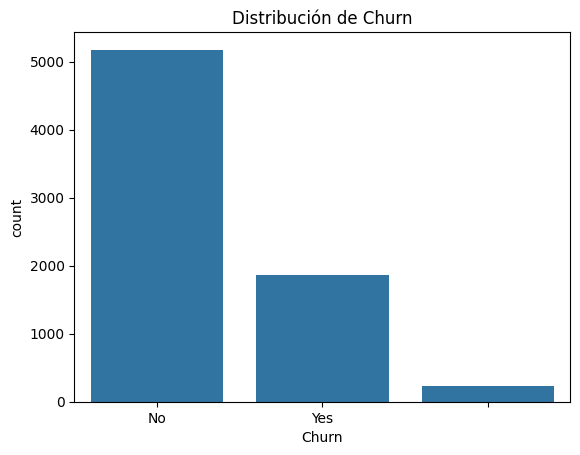

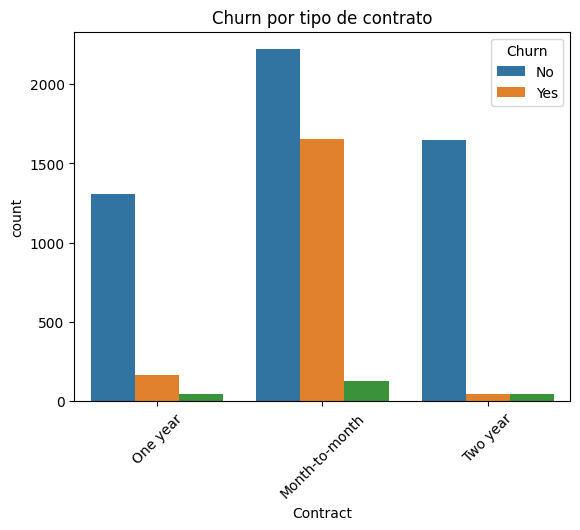

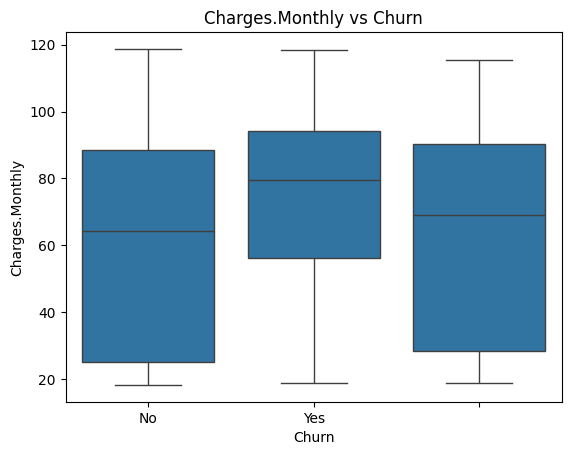

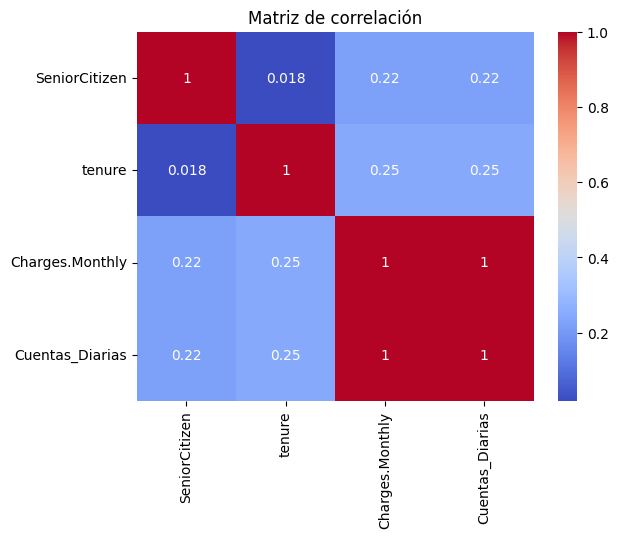

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x="Churn")
plt.title("Distribución de Churn")
plt.show()

sns.countplot(data=df, x="Contract", hue="Churn")
plt.title("Churn por tipo de contrato")
plt.xticks(rotation=45)
plt.show()

sns.boxplot(data=df, x="Churn", y="Charges.Monthly")
plt.title("Charges.Monthly vs Churn")
plt.show()

df_numeric = df.select_dtypes(include=["number"])
correlation = df_numeric.corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()

#📄Informe final

In [47]:
from IPython.display import Markdown as md

md("""
# Informe Final: Análisis de Evasión de Clientes - Telecom X

## 🔹 Introducción
Este análisis tiene como objetivo identificar patrones relacionados con la evasión de clientes (Churn) en la empresa Telecom X. A través de la limpieza, transformación y visualización de datos, buscamos entender qué factores están más relacionados con la pérdida de clientes.

## 🔹 Limpieza y Transformación
- Se cargaron datos desde un archivo JSON estructurado.
- Se aplanaron columnas anidadas.
- Se eliminaron duplicados y se corrigieron tipos de datos.
- Se creó la columna `Cuentas_Diarias` dividiendo la facturación mensual por 30.

## 🔹 Análisis Exploratorio
- **Churn** afecta aproximadamente 25,71% de los clientes.
- Se identificó que contratos mensuales tienen mayor proporción de churn.
- Clientes con menos tiempo de permanencia (tenure bajo) y facturación mensual más alta tienden a abandonar el servicio.

## 🔹 Conclusiones e Insights
- El churn es más frecuente en clientes con contratos “Month-to-month”.
- El tiempo de permanencia es un factor determinante.
- Los clientes con servicios adicionales de internet muestran menor churn.

## 🔹 Recomendaciones
- Incentivar contratos de mayor duración con beneficios económicos.
- Crear programas de fidelización para clientes nuevos.
- Monitorear más de cerca a clientes con alto gasto mensual y bajo tiempo de permanencia.

""")


# Informe Final: Análisis de Evasión de Clientes - Telecom X

## 🔹 Introducción
Este análisis tiene como objetivo identificar patrones relacionados con la evasión de clientes (Churn) en la empresa Telecom X. A través de la limpieza, transformación y visualización de datos, buscamos entender qué factores están más relacionados con la pérdida de clientes.

## 🔹 Limpieza y Transformación
- Se cargaron datos desde un archivo JSON estructurado.
- Se aplanaron columnas anidadas.
- Se eliminaron duplicados y se corrigieron tipos de datos.
- Se creó la columna `Cuentas_Diarias` dividiendo la facturación mensual por 30.

## 🔹 Análisis Exploratorio
- **Churn** afecta aproximadamente 25,71% de los clientes.
- Se identificó que contratos mensuales tienen mayor proporción de churn.
- Clientes con menos tiempo de permanencia (tenure bajo) y facturación mensual más alta tienden a abandonar el servicio.

## 🔹 Conclusiones e Insights
- El churn es más frecuente en clientes con contratos “Month-to-month”.
- El tiempo de permanencia es un factor determinante.
- Los clientes con servicios adicionales de internet muestran menor churn.

## 🔹 Recomendaciones
- Incentivar contratos de mayor duración con beneficios económicos.
- Crear programas de fidelización para clientes nuevos.
- Monitorear más de cerca a clientes con alto gasto mensual y bajo tiempo de permanencia.

